## UCL Data Analysis 

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ucl.csv')
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Lyon,Schalke 04,1,0,H,2010
1,Barcelona,Panathinaikos,5,1,H,2010
2,FC Copenhagen,Rubin Kazan,1,0,H,2010
3,Lyon,Schalke 04,1,0,H,2010
4,Benfica,Hapoel Tel Aviv,2,0,H,2010


### 1. Find total number of matches in dataset

In [3]:
df['home_team'].count()

np.int64(2922)

In [4]:
print(f'The total no of mathces are {df.shape[0]}')

The total no of mathces are 2922


### 2. How many seasons are present?

In [5]:
df['season'].unique()  # this returns all the unique values from the season column

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [6]:
print(f'No of seasons {df['season'].nunique()}')  # this n unique returns the no of unique values in the whole season column

No of seasons 12


### 3. List all unique teams

In [7]:
df['home_team'].unique()

array(['Lyon', 'Barcelona', 'FC Copenhagen', 'Benfica', 'Bursaspor',
       'Manchester Utd', 'Werder Bremen', 'Twente', 'Arsenal',
       'Real Madrid', 'Shakhtar', 'MÅ\xa0K Å½ilina', 'Marseille',
       'Bayern Munich', 'Milan', 'CFR Cluj', 'Auxerre', 'Partizan',
       'Spartak Moscow', 'Ajax', 'Braga', 'Roma', 'Chelsea', 'Basel',
       'Valencia', 'Schalke 04', 'Inter', 'Tottenham', 'Rubin Kazan',
       'Hapoel Tel Aviv', 'Rangers', 'Panathinaikos', 'Porto',
       'Olympiacos', 'Genk', 'Dortmund', 'Viktoria PlzeÅ\x88', 'APOEL FC',
       'Dinamo Zagreb', 'Manchester City', 'Lille', 'Villarreal',
       'CSKA Moscow', 'Trabzonspor', 'Napoli', 'OÈ\x9belul GalaÈ\x9bi',
       'Leverkusen', 'Zenit', 'BATE Borisov', 'Montpellier', 'Paris S-G',
       'MÃ¡laga', 'Celtic', 'Juventus', 'NordsjÃ¦lland', 'Galatasaray',
       'Anderlecht', 'Dynamo Kyiv', 'Real Sociedad', 'AtlÃ©tico Madrid',
       'Austria Wien', 'Steaua', 'Liverpool', 'Monaco', 'NK Maribor',
       'Athletic Club', 'Spor

### 4. Count home wins, away wins, draws

In [8]:
win = df['result'].value_counts()
win

result
H    1376
A     930
D     616
Name: count, dtype: int64

Text(0.5, 1.0, 'Win')

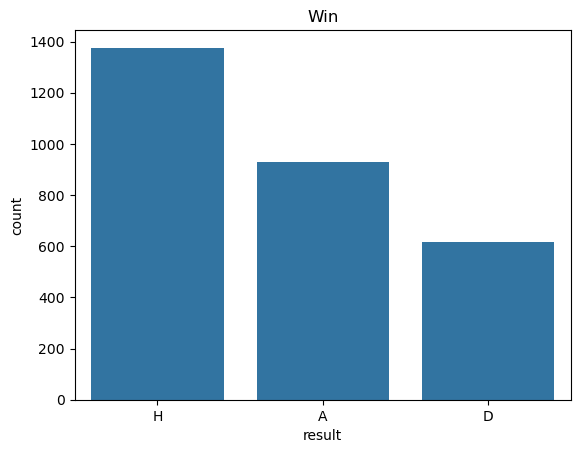

In [9]:
sns.barplot(x=win.index,y=win)
plt.title('Win')

### 5. Percentage of H / A / D

In [10]:
total_matches = df['home_team'].count()
print(f"The percentage of home team win is {win['H']*100/total_matches}")
print(f"The percentage of away team win is {win['A']*100/total_matches}")
print(f"The percentage of draw is {win['D']*100/total_matches}")

The percentage of home team win is 47.09103353867214
The percentage of away team win is 31.82751540041068
The percentage of draw is 21.08145106091718


### 6. Create total_goals column

In [11]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Lyon,Schalke 04,1,0,H,2010
1,Barcelona,Panathinaikos,5,1,H,2010
2,FC Copenhagen,Rubin Kazan,1,0,H,2010
3,Lyon,Schalke 04,1,0,H,2010
4,Benfica,Hapoel Tel Aviv,2,0,H,2010


In [12]:
df['total_goals'] = df['home_goals'] + df['away_goals']
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Lyon,Schalke 04,1,0,H,2010,1
1,Barcelona,Panathinaikos,5,1,H,2010,6
2,FC Copenhagen,Rubin Kazan,1,0,H,2010,1
3,Lyon,Schalke 04,1,0,H,2010,1
4,Benfica,Hapoel Tel Aviv,2,0,H,2010,2


### 7. Top 10 teams with most HOME wins

In [13]:
most_home_wins = df.loc[df['result'] == 'H'].groupby('home_team').size().sort_values(ascending=False).head(10)
most_home_wins

home_team
Real Madrid         104
Bayern Munich       102
Barcelona            96
Juventus             60
Manchester City      60
Chelsea              58
Paris S-G            54
AtlÃ©tico Madrid     54
Dortmund             48
Porto                46
dtype: int64

In [14]:
df[df['result'] == 'H']['home_team'].value_counts().sort_values(ascending=False).head(10)

home_team
Real Madrid         104
Bayern Munich       102
Barcelona            96
Manchester City      60
Juventus             60
Chelsea              58
Paris S-G            54
AtlÃ©tico Madrid     54
Dortmund             48
Porto                46
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Home Match Wins')

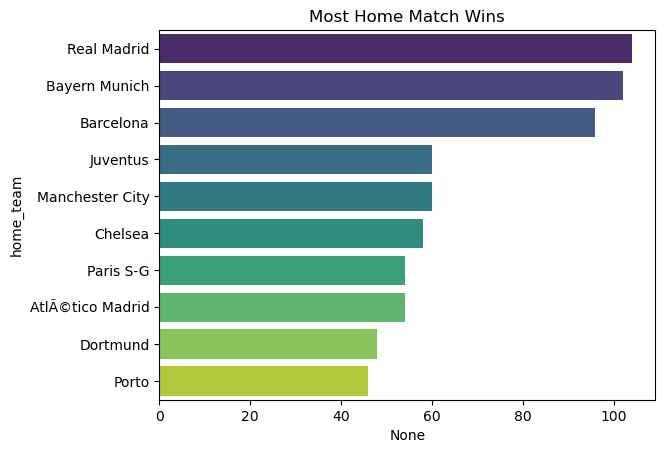

In [15]:
sns.barplot(x=most_home_wins,y=most_home_wins.index,palette='viridis')
plt.title('Most Home Match Wins')

### 8. Top 10 teams with most AWAY wins

In [16]:
most_away_wins = df[df['result'] == 'A']['away_team'].value_counts().head(10)
most_away_wins

away_team
Real Madrid         82
Bayern Munich       80
Barcelona           60
Manchester City     48
Chelsea             46
Juventus            44
Paris S-G           42
AtlÃ©tico Madrid    34
Liverpool           32
Dortmund            30
Name: count, dtype: int64

In [17]:
df.loc[df['result'] =='A'].groupby('away_team').size().sort_values(ascending=False).head(10)

away_team
Real Madrid         82
Bayern Munich       80
Barcelona           60
Manchester City     48
Chelsea             46
Juventus            44
Paris S-G           42
AtlÃ©tico Madrid    34
Liverpool           32
Dortmund            30
dtype: int64

Text(0.5, 1.0, 'Most Away Match Win')

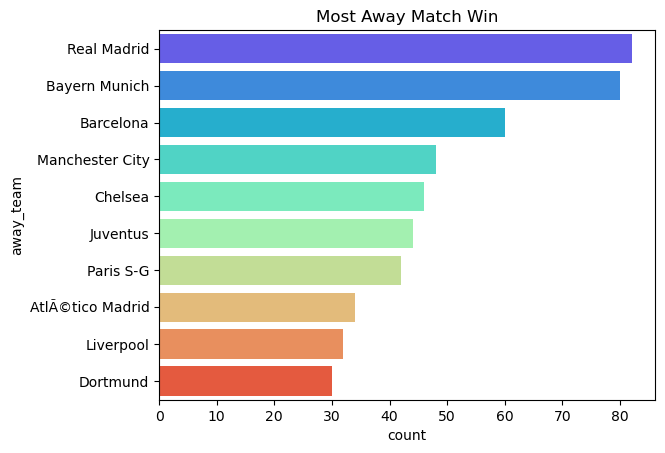

In [18]:
sns.barplot(x=most_away_wins,y=most_away_wins.index,palette='rainbow')
plt.title('Most Away Match Win')

### 9. Team that played most matches

In [19]:
home_match = df.groupby('home_team').size()
away_match = df.groupby('away_team').size()
total_matches = home_match.add(away_match).sort_values(ascending=False).head(10)
total_matches = total_matches.reset_index()
total_matches.columns = ['Team','Total Matches']
total_matches

,Team,Total Matches
0,Real Madrid,280
1,Bayern Munich,258
2,Barcelona,246
3,Manchester City,198
4,Chelsea,186
5,Juventus,186
6,AtlÃ©tico Madrid,176
7,Paris S-G,176
8,Dortmund,168
9,Benfica,158


Text(0.5, 1.0, 'Most No of Matches Played')

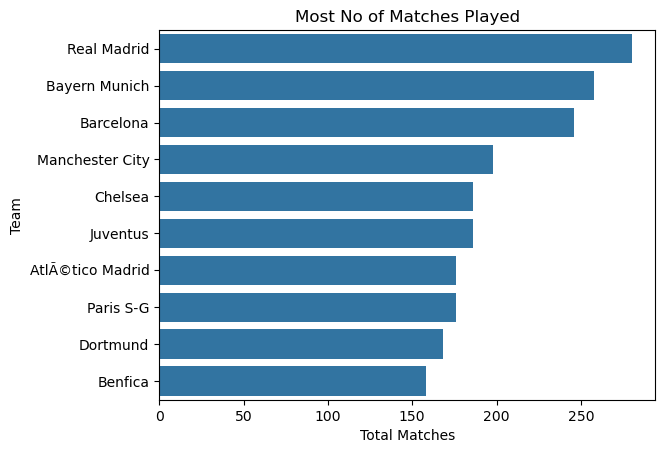

In [20]:
sns.barplot(x='Total Matches',y='Team',data=total_matches)
plt.title('Most No of Matches Played')

### 10. Team with most goals

In [21]:
home = df.groupby('home_team')['home_goals'].sum()
away = df.groupby('away_team')['away_goals'].sum()

total_goals = home.add(away).sort_values(ascending=False).head(10)
total_goals = total_goals.reset_index()
total_goals.columns = ['Team', 'Total_Goals']
total_goals

,Team,Total_Goals
0,Bayern Munich,670
1,Real Madrid,660
2,Barcelona,520
3,Manchester City,392
4,Paris S-G,372
5,Chelsea,368
6,Dortmund,294
7,Juventus,288
8,AtlÃ©tico Madrid,256
9,Liverpool,256


Text(0.5, 1.0, 'Most Goals Scored')

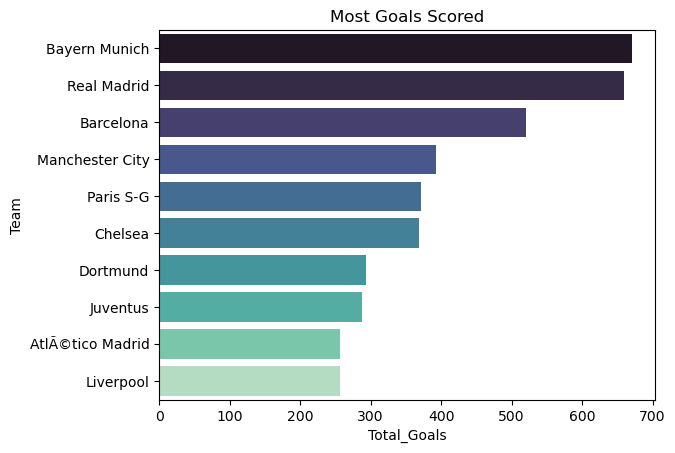

In [22]:
sns.barplot(x='Total_Goals',y='Team',data=total_goals,palette='mako')
plt.title('Most Goals Scored')

### 11. Team with most home goals

In [23]:
most_home_goals = df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head(10)
most_home_goals = most_home_goals.reset_index()
most_home_goals.columns = ['Team','Home Goals']
most_home_goals

,Team,Home Goals
0,Bayern Munich,386
1,Real Madrid,384
2,Barcelona,338
3,Manchester City,212
4,Chelsea,208
5,Paris S-G,202
6,Dortmund,170
7,Juventus,156
8,AtlÃ©tico Madrid,154
9,Porto,142


Text(0.5, 1.0, 'Most Home Goals')

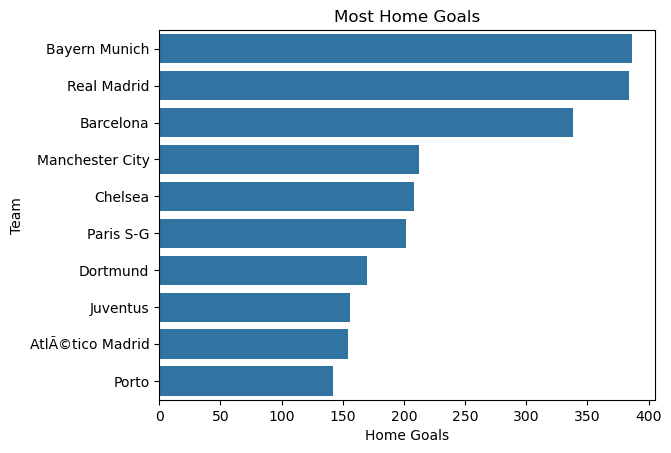

In [24]:
sns.barplot(x='Home Goals',y='Team',data=most_home_goals)
plt.title('Most Home Goals')

### 12. Teams with most away goals

In [25]:
most_away_goals = df.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).head(10)
most_away_goals = most_away_goals.reset_index()
most_away_goals.columns = ['Team','Away Goals']
most_away_goals

,Team,Away Goals
0,Bayern Munich,284
1,Real Madrid,276
2,Barcelona,182
3,Manchester City,180
4,Paris S-G,170
5,Chelsea,160
6,Juventus,132
7,Liverpool,130
8,Dortmund,124
9,AtlÃ©tico Madrid,102


Text(0.5, 1.0, 'Most Away Goals')

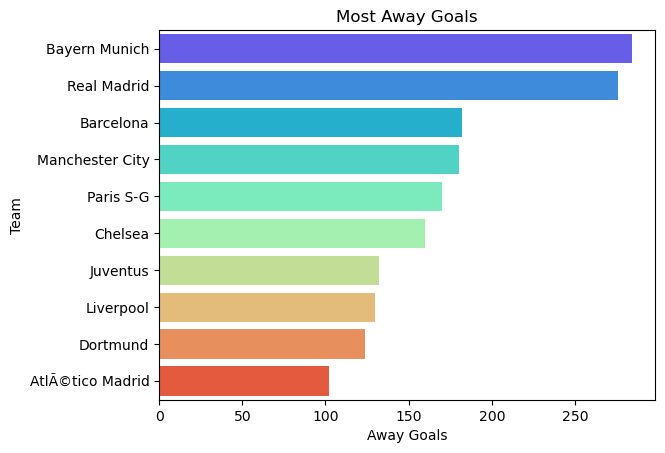

In [26]:
sns.barplot(x='Away Goals',y='Team',data=most_away_goals,palette='rainbow')
plt.title('Most Away Goals')

### 13. Goals per season

In [27]:
goals_per_season = df.groupby('season')['total_goals'].sum()
goals_per_season = goals_per_season.reset_index()
goals_per_season.columns = ['Season','Goals']
goals_per_season

,Season,Goals
0,2010,688
1,2011,698
2,2012,720
3,2013,692
4,2014,714
5,2015,724
6,2016,736
7,2017,780
8,2018,718
9,2019,772


Text(0.5, 1.0, 'Goals Per Season')

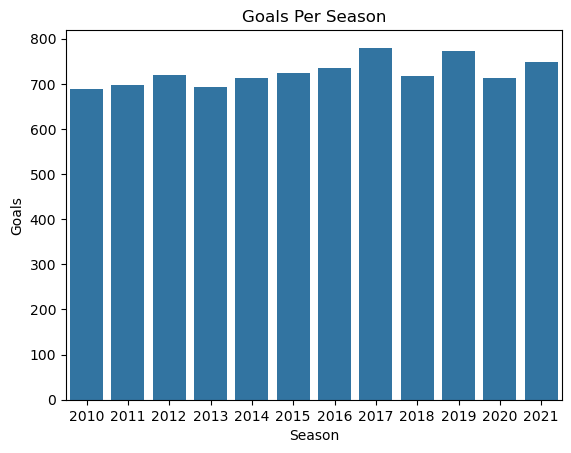

In [28]:
sns.barplot(x='Season',y='Goals',data=goals_per_season)
plt.title('Goals Per Season')

### 14. Season with highest goals

In [29]:
goals_per_season.loc[goals_per_season['Goals'] == goals_per_season['Goals'].max()]

,Season,Goals
7,2017,780


### 15. Home win % by season

In [30]:
matches_per_season = df.groupby('season').size()
home_wins_per_season = df[df['result'] == 'H'].groupby('season').size()

percentage_of_home_wins = (home_wins_per_season * 100)/matches_per_season

percentage_of_home_wins = percentage_of_home_wins.reset_index()

percentage_of_home_wins.columns = ['Season','Home Win Percentage']

percentage_of_home_wins['Home Win Percentage'] = percentage_of_home_wins['Home Win Percentage'].round(2)
percentage_of_home_wins

,Season,Home Win Percentage
0,2010,51.64
1,2011,47.54
2,2012,46.72
3,2013,50.82
4,2014,50.82
5,2015,55.74
6,2016,44.26
7,2017,45.08
8,2018,44.26
9,2019,42.86


Text(0.5, 1.0, 'Most Home Win Percentage')

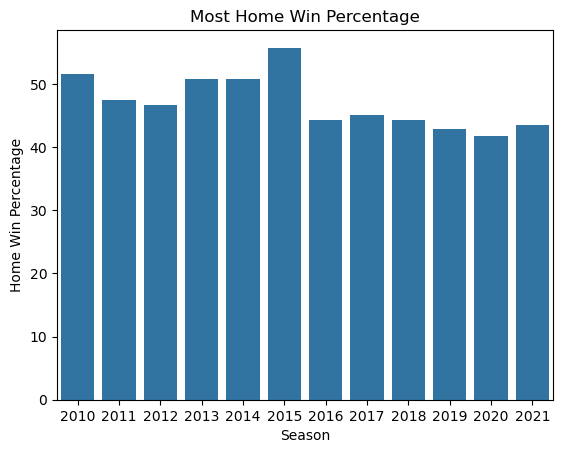

In [31]:
sns.barplot(x='Season',y='Home Win Percentage',data=percentage_of_home_wins)
plt.title('Most Home Win Percentage')

### 16. Matches with 5+ total goals

In [32]:
df[df['total_goals'] >= 5]

,home_team,away_team,home_goals,away_goals,result,season,total_goals
1,Barcelona,Panathinaikos,5,1,H,2010,6
12,Barcelona,Panathinaikos,5,1,H,2010,6
16,Arsenal,Braga,6,0,H,2010,6
19,MÅ K Å½ilina,Chelsea,1,4,A,2010,5
24,Arsenal,Braga,6,0,H,2010,6
...,...,...,...,...,...,...,...
2910,Liverpool,Benfica,3,3,D,2021,6
2912,Manchester City,Real Madrid,4,3,H,2021,7
2913,Manchester City,Real Madrid,4,3,H,2021,7
2916,Villarreal,Liverpool,2,3,A,2021,5


### 17. Teams with most 5+ goals

In [33]:
ht = df[df['home_goals'] >= 5].groupby('home_team').size()
at = df[df['away_goals'] >= 5].groupby('away_team').size()

most_fifer = ht.add(at,fill_value=0).sort_values(ascending=False).dropna()
most_fifer = most_fifer.reset_index()
most_fifer.columns = ['Team', 'No']
most_fifer

,Team,No
0,Bayern Munich,40.0
1,Real Madrid,24.0
2,Barcelona,20.0
3,Paris S-G,18.0
4,Manchester City,14.0
5,Liverpool,12.0
6,Chelsea,10.0
7,Shakhtar,6.0
8,Arsenal,6.0
9,Porto,6.0


### 18. Teams with best win percentage 

In [34]:
hw = df[df['result'] == 'H'].groupby('home_team').size()
aw = df[df['result'] == 'A'].groupby('away_team').size()
total_wins = hw.add(aw,fill_value=0).sort_values(ascending=False)

hm = df.groupby('home_team').size()
am = df.groupby('away_team').size()
total_m = hm.add(am,fill_value=0).sort_values(ascending=False)

win_percentage = ((total_wins/total_m)*100).sort_values(ascending=False)

win_percentage = win_percentage.reset_index()
win_percentage.columns = ['Team','Win Percentage']

win_percentage.fillna(0,inplace=True)
win_percentage_top10 = win_percentage.head(10)
win_percentage_top10

,Team,Win Percentage
0,Bayern Munich,70.542636
1,Real Madrid,66.428571
2,Barcelona,63.414634
3,Liverpool,57.377049
4,Chelsea,55.913978
5,Juventus,55.913978
6,Paris S-G,54.545455
7,Manchester City,54.545455
8,Arsenal,52.830189
9,Leicester City,50.000000


Text(0.5, 1.0, 'Most Win Percentage')

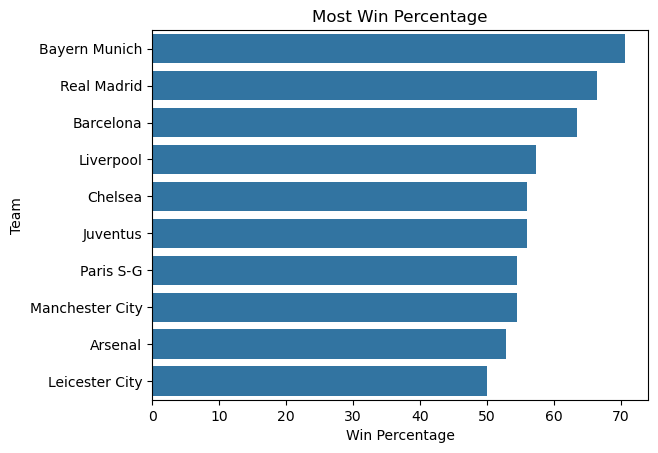

In [35]:
sns.barplot(y='Team',x='Win Percentage',data=win_percentage_top10)
plt.title('Most Win Percentage')

## Key Insights & Conclusion

1. **Home Advantage**
- Home teams win around 47.09% of matches, showing clear home advantage in UCL.

2. **Most Successful Teams**
- Real Madrid / Bayern / Barcelona dominate in both total goals and win percentage.

3. **Season Trend**
- Season 2017 recorded the highest number of goals, indicating more attacking football.

4. **High Scoring Games**
- Only a few elite teams contribute to most 5+ goal matches.

5. **Overall Conclusion**
- Teams with strong home performance and high goal conversion tend to progress deeper in the competition.
